### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
data=data.drop_duplicates() #drop any duplicates
data.shape
data.isnull().sum().sort_values(ascending=False) # counting the number of null values for each column

car                     12502
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 150
RestaurantLessThan20      129
Bar                       107
destination                 0
passanger                   0
direction_opp               0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
occupation                  0
education                   0
has_children                0
maritalStatus               0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
Y                           0
dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Scooter and motorcycle'),
  Text(1, 0, 'crossover'),
  Text(2, 0, 'Mazda5'),
  Text(3, 0, 'do not drive'),
  Text(4, 0, 'Car that is too old to install Onstar :D')])

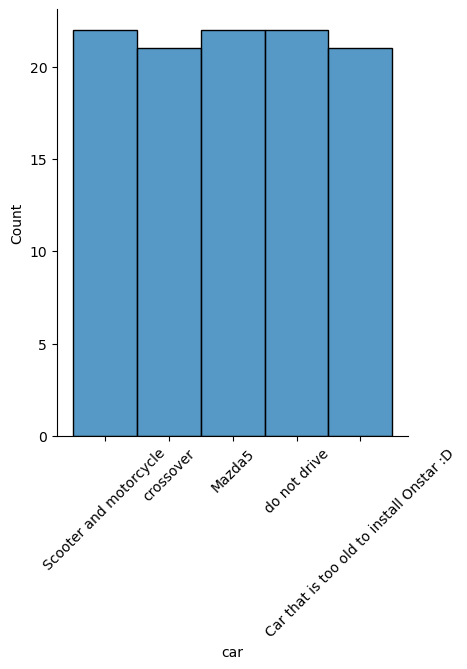

In [6]:
sns.displot(data['car'])
plt.xticks(rotation = 45)

In [7]:


#Drop the Car column which has missing values in >99% of rows.
data=data.drop(['car'], axis=1)

#replace the missing values in other columns with mode in place.
for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)


4. What proportion of the total observations chose to accept the coupon? 



In [8]:
data['Y'].value_counts()

1    7157
0    5453
Name: Y, dtype: int64

<Axes: xlabel='Y', ylabel='count'>

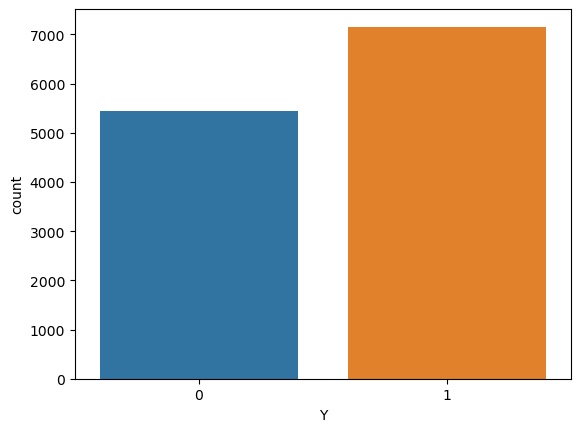

In [9]:
sns.countplot(data,x='Y')

In [10]:

Y_counts = data.groupby('Y').Y.count()
print('Accepted:', round(Y_counts[1]/data.shape[0]*100,4),'%')
print('Rejected:', round(Y_counts[0]/data.shape[0]*100,4),'%')

Accepted: 56.7565 %
Rejected: 43.2435 %


5. Use a bar plot to visualize the `coupon` column.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

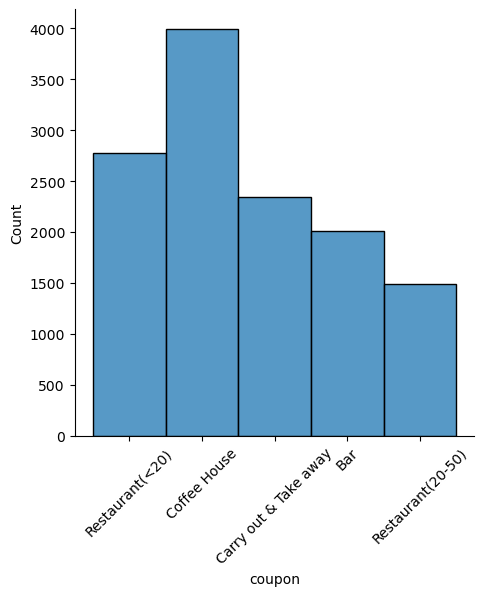

In [18]:
sns.displot(data=data['coupon'])
plt.xticks(rotation = 45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Carry out & Take away'),
  Text(2, 0, 'Coffee House'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

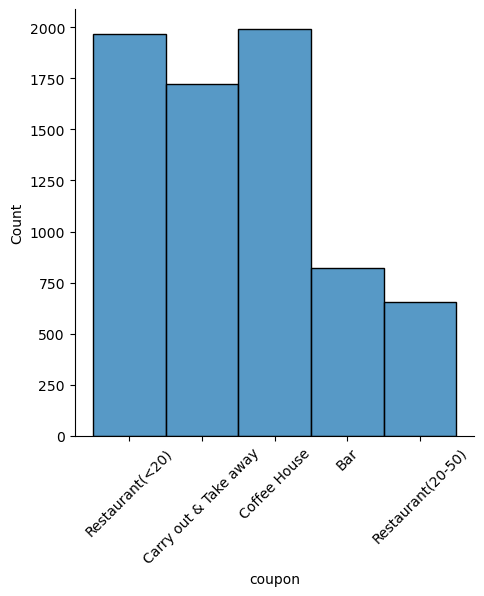

In [19]:
coupons_accepted = data.query('Y == 1')
sns.displot(data=coupons_accepted['coupon'])
plt.xticks(rotation = 45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Coffee House'),
  Text(1, 0, 'Bar'),
  Text(2, 0, 'Restaurant(<20)'),
  Text(3, 0, 'Carry out & Take away'),
  Text(4, 0, 'Restaurant(20-50)')])

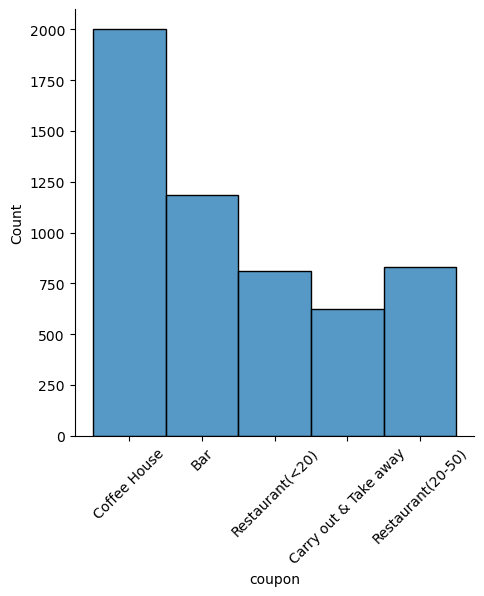

In [20]:
coupons_rejected = data.query('Y == 0')
sns.displot(data=coupons_rejected['coupon'])
plt.xticks(rotation = 45)

In [43]:
df = data.groupby('coupon')['Y'].agg(['count', 'sum'])
df['percentage'] = 100 * df['sum'] / df['count']
df = df.rename(columns={'count': 'total', 'sum': 'accepted'})
print(df)

                       total  accepted  percentage
coupon                                            
Bar                     2010       824   40.995025
Carry out & Take away   2344      1720   73.378840
Coffee House            3989      1989   49.862121
Restaurant(20-50)       1488       657   44.153226
Restaurant(<20)         2779      1967   70.780856


6. Use a histogram to visualize the temperature column.

array([[<Axes: title={'center': 'temperature'}>]], dtype=object)

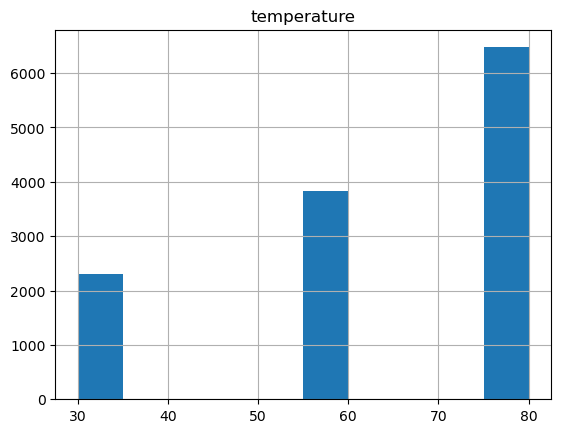

In [40]:
data.hist('temperature')

In [41]:
data.corr()

/var/folders/r4/l04k94616gg5y_19vs3yw5j40000gq/T/ipykernel_36621/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.018599,NaN,-0.157089,-0.227165,0.097972,-0.097972,0.059393
has_children,-0.018599,1.000000,NaN,0.079434,-0.010773,-0.032353,0.032353,-0.045056
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.157089,0.079434,NaN,1.000000,0.321260,-0.302066,0.302066,-0.082693
toCoupon_GEQ25min,-0.227165,-0.010773,NaN,0.321260,1.000000,-0.189900,0.189900,-0.108139
direction_same,0.097972,-0.032353,NaN,-0.302066,-0.189900,1.000000,-1.000000,0.014932
direction_opp,-0.097972,0.032353,NaN,0.302066,0.189900,-1.000000,1.000000,-0.014932
Y,0.059393,-0.045056,NaN,-0.082693,-0.108139,0.014932,-0.014932,1.000000


In [42]:
data.cov()

/var/folders/r4/l04k94616gg5y_19vs3yw5j40000gq/T/ipykernel_36621/4020818503.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.cov()


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,366.852199,-0.175502,0.0,-1.493656,-1.393448,0.771641,-0.771641,0.563590
has_children,-0.175502,0.242711,0.0,0.019427,-0.001700,-0.006554,0.006554,-0.010997
toCoupon_GEQ5min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
toCoupon_GEQ15min,-1.493656,0.019427,0.0,0.246444,0.051076,-0.061664,0.061664,-0.020338
toCoupon_GEQ25min,-1.393448,-0.001700,0.0,0.051076,0.102567,-0.025009,0.025009,-0.017158
direction_same,0.771641,-0.006554,0.0,-0.061664,-0.025009,0.169098,-0.169098,0.003042
direction_opp,-0.771641,0.006554,0.0,0.061664,0.025009,-0.169098,0.169098,-0.003042
Y,0.563590,-0.010997,0.0,-0.020338,-0.017158,0.003042,-0.003042,0.245454


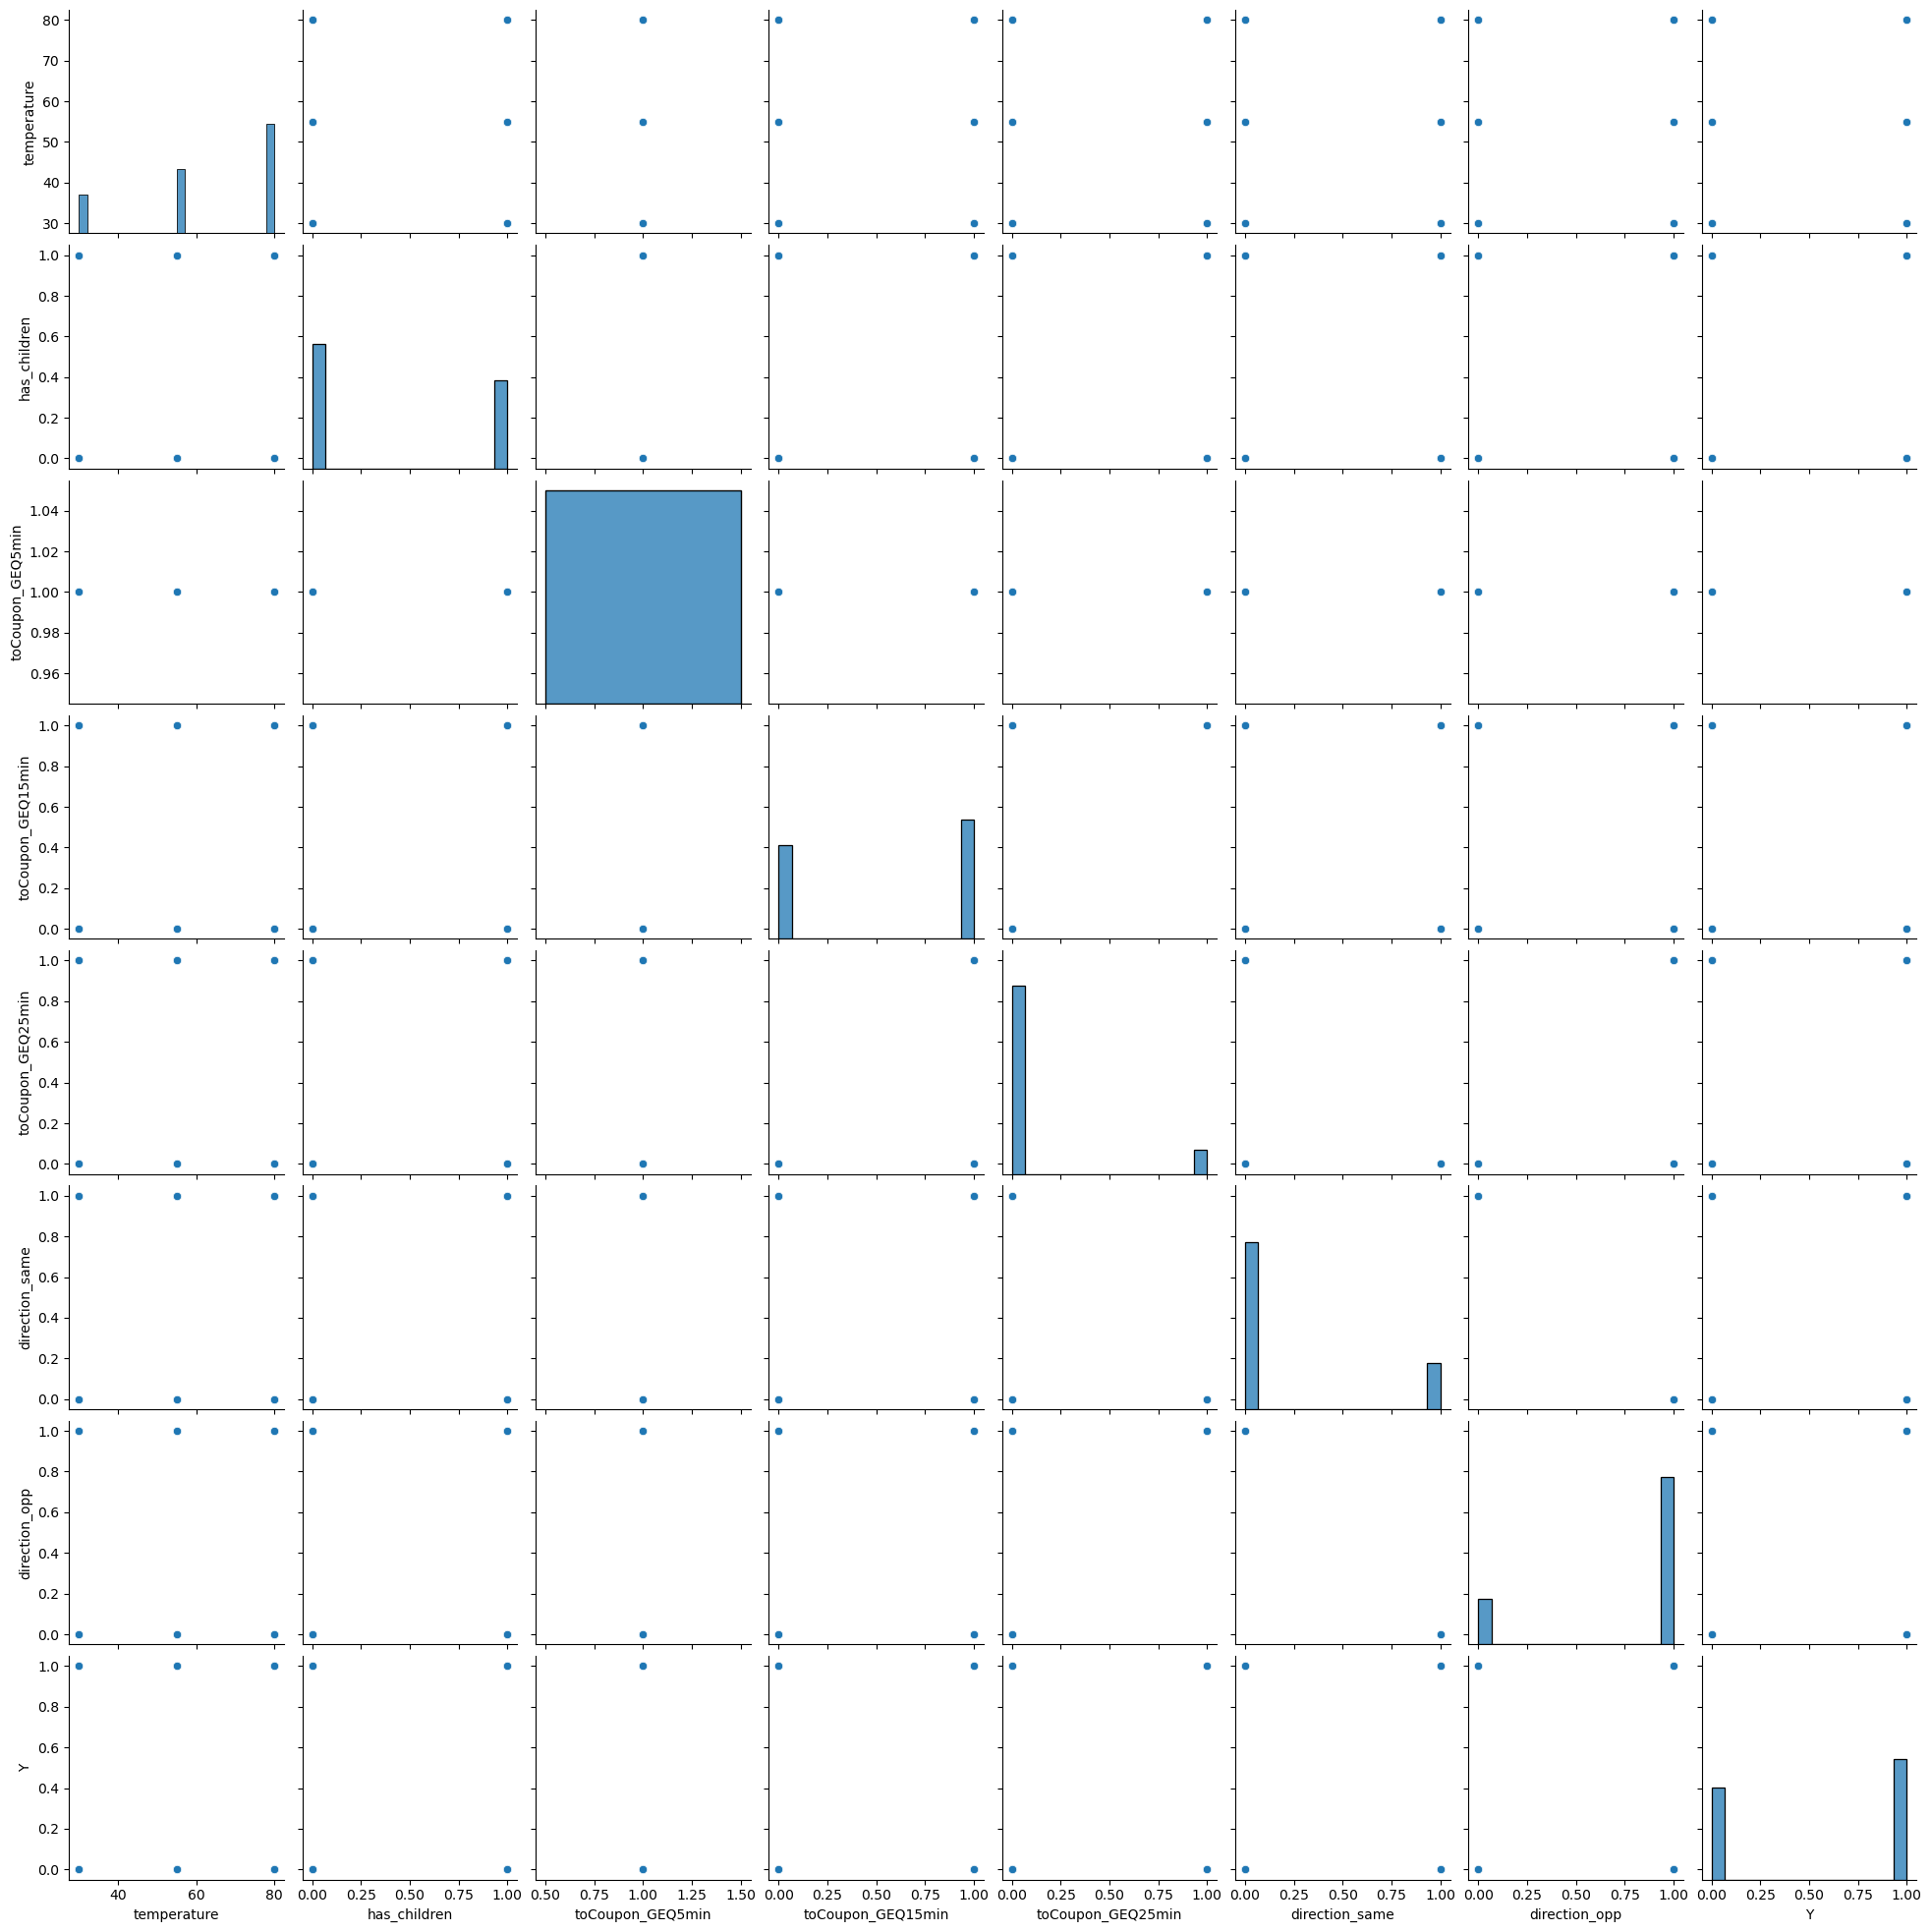

In [15]:
sns.pairplot(data)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [48]:
bar_df=data.query("coupon == 'Bar'")
bar_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [77]:
#bar_df.query("Y == 1")['Y'].count() / bar_df['Y'].count()
print("Proportion of bar coupons accepted is ", bar_df.query("Y == 1")['Y'].count() / bar_df['Y'].count()*100, "%")

Proportion of bar coupons accepted is  40.99502487562189 %


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


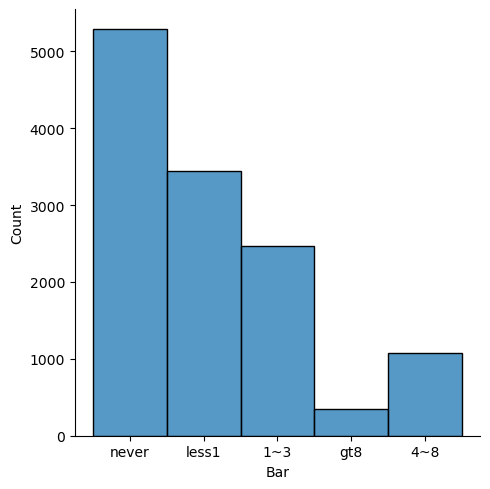

In [46]:
sns.displot(data['Bar'])

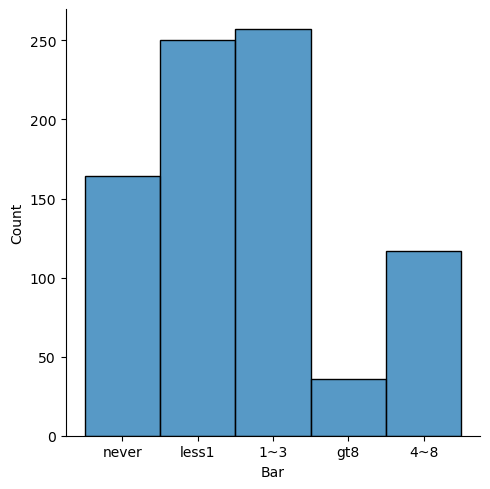

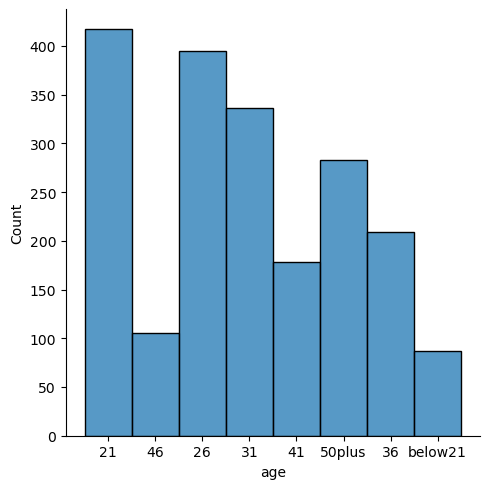

In [56]:
sns.displot(data.query("coupon == 'Bar' and Y == 1")['Bar'])
sns.displot(data.query("coupon == 'Bar'")['age'])

In [50]:
bar_lower = data.query("(Bar == 'never' or Bar == 'less1' or Bar == '1~3') and coupon=='Bar'")
bar_greater = data.query("(Bar == 'gt8' or Bar == '4~8') and coupon=='Bar'")
print(bar_lower['Y'].count())
print(bar_greater['Y'].count())

print(bar_lower.query("Y==1")['Y'].count() / bar_lower['Y'].count())
print(bar_greater.query("Y==1")['Y'].count() / bar_greater['Y'].count())

1811
199
0.37051352843732743
0.7688442211055276


In [79]:
print ("Findings #3")
print("Acceptance rate in those who go to bar more than 3 times is 77% while the acceptance rate of bar coupon generally is only 41%")

Findings #3
Acceptance rate in those who go to bar more than 3 times is 77% while the acceptance rate of bar coupon generally is only 41%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [59]:
data.loc[data['age'] == 'below21', 'age'] = '20'
data.loc[data['age'] == '50plus', 'age'] = '51'
data['age'] = data['age'].astype(int)
bar_query = data.query("(Bar == '1~3' or Bar == 'gt8' or Bar == '4~8' and age > 25) and coupon=='Bar'")
bar_others = data.query("(Bar == 'never' or Bar == 'less1' and age <= 25) and coupon=='Bar'")

print(bar_query['Y'].count())
print(bar_others['Y'].count())

print(bar_query.query("Y==1")['Y'].count() / bar_query['Y'].count())
print(bar_others.query("Y==1")['Y'].count() / bar_others['Y'].count())


552
971
0.6829710144927537
0.24098867147270855


In [80]:
print("Findings q#4")
print("Acceptance rate in the drivers who go to a bar more than once a month and are over the age 0f 25 is higher compared to the others. Their acceptance rate is 68% while it is 24% for the others")

Findings q#4
Acceptance rate in the drivers who go to a bar more than once a month and are over the age 0f 25 is higher compared to the others. Their acceptance rate is 68% while it is 24% for the others


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [65]:
bar_more_than_once = data.query("(Bar=='1~3' or Bar == 'gt8' or Bar == '4~8') and coupon=='Bar'")
bar_more_than_once_no_kid_passangers=bar_more_than_once.query(" passanger != 'Kid(s)' ")
bar_query=bar_more_than_once_no_kid_passangers.query(" occupation != 'farming, fishing, or forestry' ")
print(bar_query['Y'].count())

print(bar_query.query("Y==1")['Y'].count() / bar_query['Y'].count())

551
0.7132486388384754


In [81]:
print("Findings q#5")
print("Acceptance rate in the drivers who go to a bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing or forestry  is higher compared to the others")

Findings q#5
Acceptance rate in the drivers who go to a bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing or forestry  is higher compared to the others


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Architecture & Engineering'),
  Text(2, 0, 'Student'),
  Text(3, 0, 'Education&Training&Library'),
  Text(4, 0, 'Healthcare Support'),
  Text(5, 0, 'Healthcare Practitioners & Technical'),
  Text(6, 0, 'Sales & Related'),
  Text(7, 0, 'Management'),
  Text(8, 0, 'Arts Design Entertainment Sports & Media'),
  Text(9, 0, 'Computer & Mathematical'),
  Text(10, 0, 'Life Physical Social Science'),
  Text(11, 0, 'Personal Care & Service'),
  Text(12, 0, 'Community & Social Services'),
  Text(13, 0, 'Office & Administrative Support'),
  Text(14, 0, 'Construction & Extraction'),
  Text(15, 0, 'Legal'),
  Text(16, 0, 'Retired'),
  Text(17, 0, 'Installation Maintenance & Repair'),
  Text(18, 0, 'Transportation & Material Moving'),
  Text(19, 0, 'Business & Financial'),
  Text(20, 0, 'Protective Service'),
  Text(21,

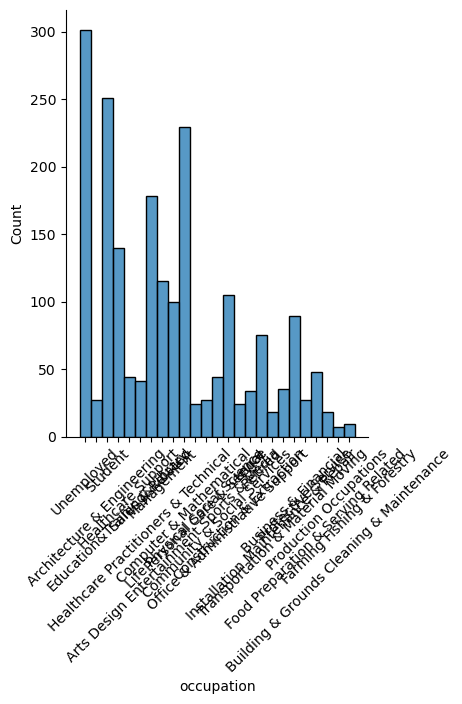

In [67]:
sns.displot(data.query("coupon == 'Bar'")['occupation'])
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'Student'),
  Text(1, 0, 'Healthcare Support'),
  Text(2, 0, 'Management'),
  Text(3, 0, 'Unemployed'),
  Text(4, 0, 'Sales & Related'),
  Text(5, 0, 'Office & Administrative Support'),
  Text(6, 0, 'Construction & Extraction'),
  Text(7, 0, 'Legal'),
  Text(8, 0, 'Life Physical Social Science'),
  Text(9, 0, 'Retired'),
  Text(10, 0, 'Computer & Mathematical'),
  Text(11, 0, 'Healthcare Practitioners & Technical'),
  Text(12, 0, 'Personal Care & Service'),
  Text(13, 0, 'Architecture & Engineering'),
  Text(14, 0, 'Arts Design Entertainment Sports & Media'),
  Text(15, 0, 'Protective Service'),
  Text(16, 0, 'Business & Financial'),
  Text(17, 0, 'Food Preparation & Serving Related'),
  Text(18, 0, 'Installation Maintenance & Repair'),
  Text(19, 0, 'Education&Training&Library'),
  Text(20, 0, 'Community & Social Services'),
  Text(21, 0, 'Production Occupatio

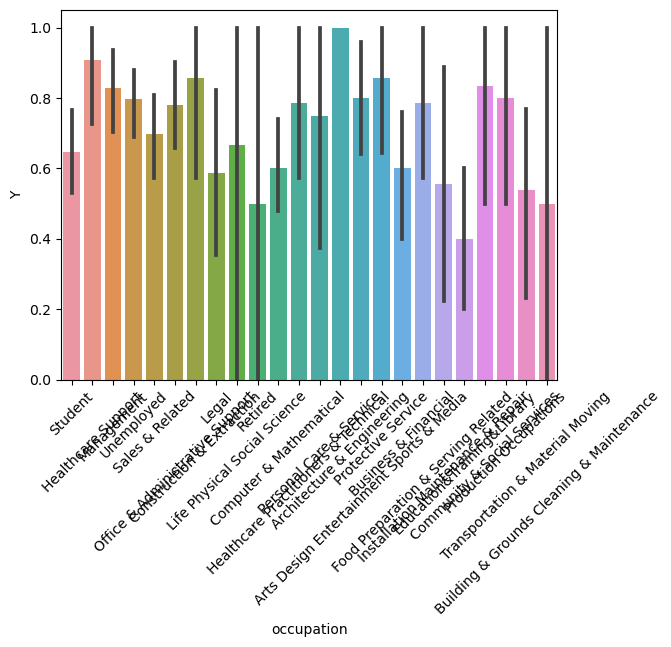

In [68]:
sns.barplot(data=bar_more_than_once_no_kid_passangers, x='occupation', y='Y')
plt.xticks(rotation = 45)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



551
336
458
Findings q#6
acceptance rate of those who go to bars more than once a month, had no kid passengers, and were not widowed :  0.7132486388384754
Acceptance rate of those who go to bars more than once a month and are under the age of 30 :  0.7202380952380952
Acceptance rate of those who go to cheap restaurants more than 4 times and income < 50k :  0.6266375545851528


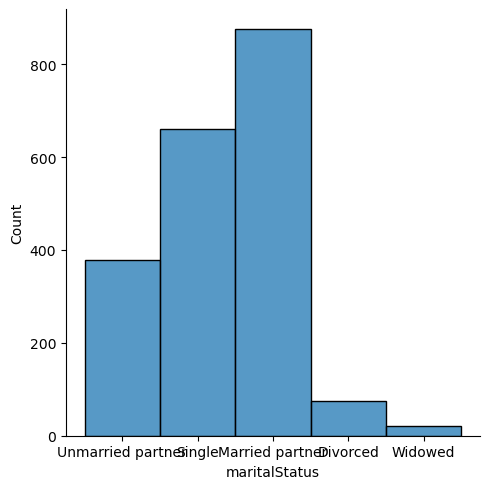

In [89]:
sns.displot(data.query("coupon == 'Bar'")['maritalStatus'])
bar_q1 = bar_more_than_once_no_kid_passangers.query("maritalStatus !='widowed'")
print(bar_q1['Y'].count())
bar_q2 = bar_more_than_once_no_kid_passangers.query("age < 30")
print(bar_q2['Y'].count())
bar_q3=data.query("income == 'Less than $12500' or income == '12500 - 24999' or income == '25000 - 37499' or income == '37500 - 49999' and coupon =='Bar'")
bar_q4=bar_q3.query("RestaurantLessThan20 in ('gt8','4~8')")
print(bar_q4['Y'].count())
print("Findings q#6")
print("acceptance rate of those who go to bars more than once a month, had no kid passengers, and were not widowed : ", bar_q1.query("Y==1")['Y'].count() / bar_q1['Y'].count())
print("Acceptance rate of those who go to bars more than once a month and are under the age of 30 : ",  bar_q2.query("Y==1")['Y'].count() / bar_q2['Y'].count())
print("Acceptance rate of those who go to cheap restaurants more than 4 times and income < 50k : ",  bar_q4.query("Y==1")['Y'].count() / bar_q4['Y'].count())




7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Based on these observations, the drivers who go to bar frequently and with no kids passengers and are between age of 21 and 30 will have higher acceptance rates for bar coupons.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bar'),
  Text(1, 0, 'Carry out & Take away'),
  Text(2, 0, 'Coffee House'),
  Text(3, 0, 'Restaurant(20-50)'),
  Text(4, 0, 'Restaurant(<20)')])

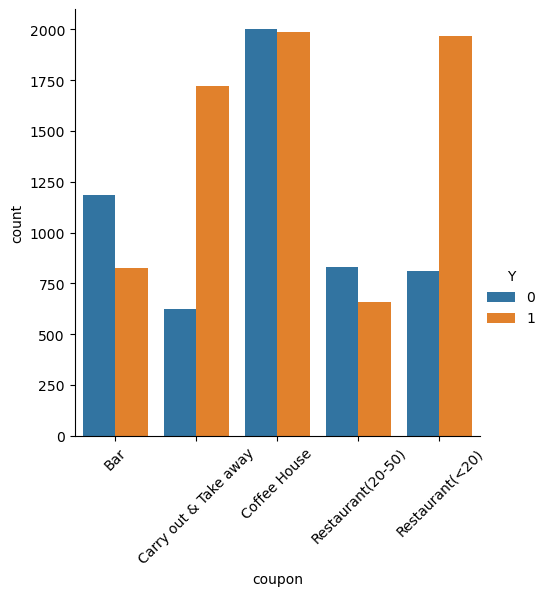

In [91]:
coupons=data.groupby("coupon", as_index=False)[["Y"]].value_counts()
sns.catplot(coupons, kind='bar', x='coupon', y='count', hue='Y', errorbar="sd")
plt.xticks(rotation = 45)



In [94]:
coffee_df=data.query("coupon == 'Coffee House'")

In [95]:
coffee_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0


In [96]:
print("Proportion of CoffeeHouse coupons accepted is ", coffee_df.query("Y == 1")['Y'].count() / coffee_df['Y'].count()*100, "%")

Proportion of CoffeeHouse coupons accepted is  49.862120832288795 %


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Architecture & Engineering'),
  Text(2, 0, 'Student'),
  Text(3, 0, 'Education&Training&Library'),
  Text(4, 0, 'Healthcare Support'),
  Text(5, 0, 'Healthcare Practitioners & Technical'),
  Text(6, 0, 'Sales & Related'),
  Text(7, 0, 'Management'),
  Text(8, 0, 'Arts Design Entertainment Sports & Media'),
  Text(9, 0, 'Computer & Mathematical'),
  Text(10, 0, 'Life Physical Social Science'),
  Text(11, 0, 'Personal Care & Service'),
  Text(12, 0, 'Community & Social Services'),
  Text(13, 0, 'Office & Administrative Support'),
  Text(14, 0, 'Construction & Extraction'),
  Text(15, 0, 'Legal'),
  Text(16, 0, 'Retired'),
  Text(17, 0, 'Installation Maintenance & Repair'),
  Text(18, 0, 'Transportation & Material Moving'),
  Text(19, 0, 'Business & Financial'),
  Text(20, 0, 'Protective Service'),
  Text(21,

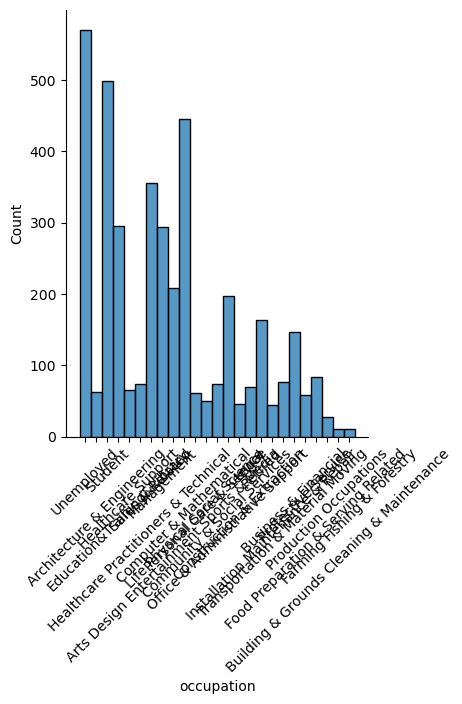

In [97]:
sns.displot(data.query("coupon == 'Coffee House'")['occupation'])
plt.xticks(rotation = 45)

([0, 1, 2], [Text(0, 0, 'Sunny'), Text(1, 0, 'Rainy'), Text(2, 0, 'Snowy')])

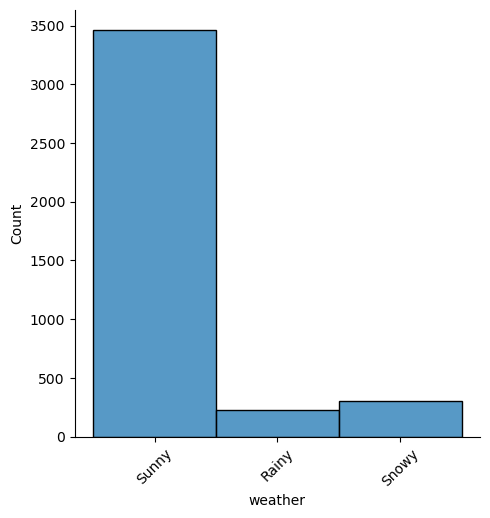

In [101]:
sns.displot(data.query("coupon == 'Coffee House'")['weather'])
plt.xticks(rotation = 45)

In [105]:
coffee_sunny = data.query("(weather == 'Sunny') and coupon=='Coffee House'")
coffee_rainy = data.query("(weather == 'Rainy') and coupon=='Coffee House'")
coffee_snowy = data.query("(weather == 'Snowy') and coupon=='Coffee House'")

print(coffee_sunny['Y'].count())
print(coffee_rainy['Y'].count())
print(coffee_snowy['Y'].count())

print(coffee_sunny.query("Y==1")['Y'].count() / coffee_sunny['Y'].count())
print(coffee_rainy.query("Y==1")['Y'].count() / coffee_rainy['Y'].count())
print(coffee_snowy.query("Y==1")['Y'].count() / coffee_snowy['Y'].count())

3461
226
302
0.5027448714244438
0.5221238938053098
0.4337748344370861


Findings : 
Based on the data, Acceptance rate of Coffee House coupons is highly dependent on the weather.

([0, 1, 2, 3, 4],
 [Text(0, 0, '10AM'),
  Text(1, 0, '2PM'),
  Text(2, 0, '6PM'),
  Text(3, 0, '7AM'),
  Text(4, 0, '10PM')])

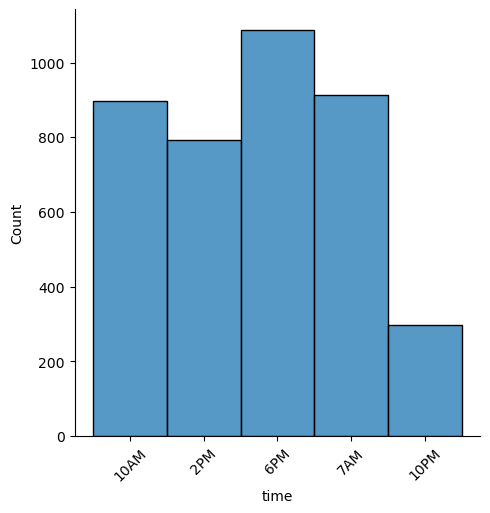

In [106]:
sns.displot(data.query("coupon == 'Coffee House'")['time'])
plt.xticks(rotation = 45)

In [109]:
coffee_day = data.query("(time == '10AM' or time == '7AM' or time == '2PM') and coupon=='Coffee House'")
coffee_night = data.query("(time == '10PM') and coupon=='Coffee House'")

print(coffee_day['Y'].count())
print(coffee_night['Y'].count())

print(coffee_day.query("Y==1")['Y'].count() / coffee_day['Y'].count())

print(coffee_night.query("Y==1")['Y'].count() / coffee_night['Y'].count())


2604
297
0.543778801843318
0.42424242424242425


Findings : Based on the data, the acceptance rate of coffee coupons is higher in the day times compared to the night times and it is not heavily dependent on the weather.

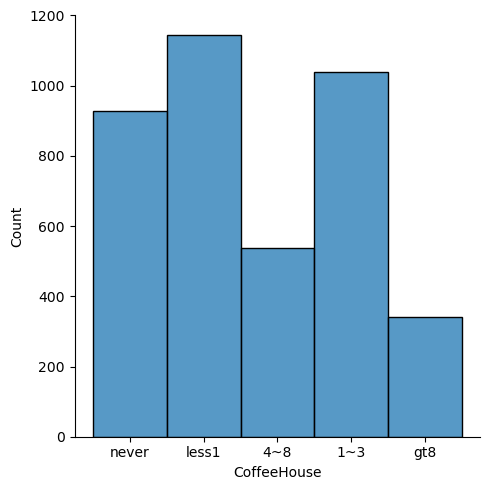

In [110]:
sns.displot(data.query("coupon == 'Coffee House'")['CoffeeHouse'])


In [111]:
coffee_never_less1= data.query("(CoffeeHouse == 'never' or CoffeeHouse == 'less1') and coupon=='Coffee House'")
coffee_1_or_more= data.query("(CoffeeHouse == '4~8' or CoffeeHouse == '1~3' or CoffeeHouse == 'gt8') and coupon=='Coffee House'")

In [112]:
print(coffee_never_less1['Y'].count())
print(coffee_1_or_more['Y'].count())

print(coffee_never_less1.query("Y==1")['Y'].count() / coffee_never_less1['Y'].count())

print(coffee_1_or_more.query("Y==1")['Y'].count() / coffee_1_or_more['Y'].count())


2071
1918
0.3491067117334621
0.6600625651720542


#### Findings : 
     Based on the data, 
        the acceptance rate of coffee coupons is higher in the day times compared to the night times
        the acceptance rate is not heavily dependent on the weather. rainy weather has slightly higher acceptance rate.
        the acceptance rate of the drivers who go to coffee shops more than once is higher.

### Recommendation : For the Coffee House coupons, target the drivers who frequently goes to coffee shops during morning times.